In [1]:
from typing import Dict, List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import random

from consts import default_random_seed, y1_dist_param_default, y0_dist_param_default, omega_default, beta_d_default
from estimations import estimate_beta_d_from_realizations
from sample_generation import create_sample
from strata import Strata

random.seed(default_random_seed)

# SCATE(x)

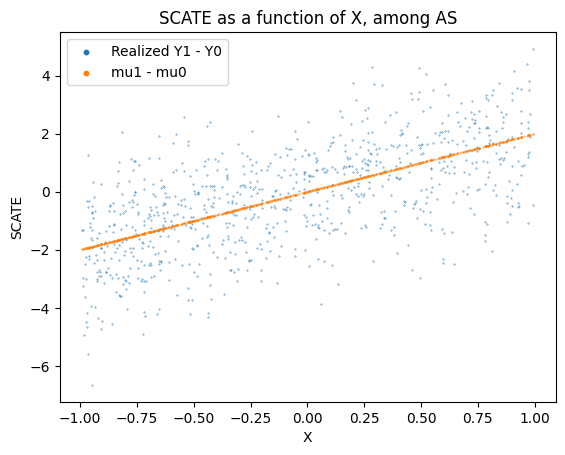

In [2]:
def plot_scate(df: pd.DataFrame,
               y0_dist_param_for_scate: Dict[str,float] = y0_dist_param_default,
               y1_dist_param_for_scate: Dict[str,float] = y1_dist_param_default):
    df_plot_as = df.loc[df.stratum==Strata.AS.name]
    mu0 = df_plot_as.mu0
    mu1 = df_plot_as.mu1
    plt.scatter(df_plot_as.x, np.array(df_plot_as.Y1 - df_plot_as.Y0), label = "Realized Y1 - Y0", s=0.1)
    # plt.scatter(df_plot_as.x, np.array(df_plot_as.Y1 - df_plot_as.Y0), label = "Bounded Y1-Y0", s=0.1) TODO
    plt.scatter(df_plot_as.x, mu1 - mu0, label = "mu1 - mu0", s=0.1)
    plt.legend(markerscale=10)
    plt.title("SCATE as a function of X, among AS")
    plt.xlabel('X')
    plt.ylabel('SCATE')
    plt.show()

plot_scate(create_sample())


# TODO also here - do we want $\bar{Y_1}|AS-\bar{Y_0}|AS$ as function of descrete groups of X? <br>
# -> + add Zhang & Rubin

# CATE(x) on D

In [3]:
sample_for_D_CATE = create_sample()

beta_d_hat: [-1.99, -1.68, 0.63]
(True beta_d: [-2.0, -2.0, 1.0])


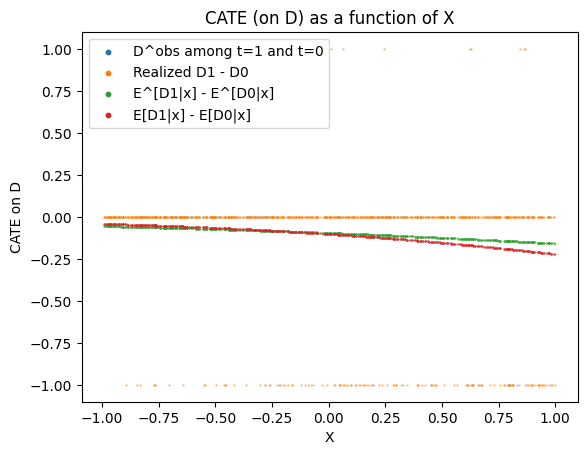

In [4]:
def plot_cate_on_d(omega_for_cate: float= omega_default, beta_d_for_cate: List[float] = beta_d_default):
    D0_prob = np.array([(1 / (1 + np.exp(-omega_for_cate*(beta_d_for_cate[0] + beta_d_for_cate[1]*0 + beta_d_for_cate[2]*x)))) for x in sample_for_D_CATE.x.values])
    D1_prob = np.array([(1 / (1 + np.exp(-omega_for_cate*(beta_d_for_cate[0] + beta_d_for_cate[1]*1 + beta_d_for_cate[2]*x)))) for x in sample_for_D_CATE.x.values])

    beta_hat_for_cate = estimate_beta_d_from_realizations(beta_d_for_cate, sample_for_D_CATE)
    D0_prob_hat = np.array([(1 / (1 + np.exp(-omega_for_cate*(beta_hat_for_cate[0] + beta_hat_for_cate[1]*0 + beta_hat_for_cate[2]*x)))) for x in sample_for_D_CATE.x.values])
    D1_prob_hat = np.array([(1 / (1 + np.exp(-omega_for_cate*(beta_hat_for_cate[0] + beta_hat_for_cate[1]*1 + beta_hat_for_cate[2]*x)))) for x in sample_for_D_CATE.x.values])

    plt.scatter(sample_for_D_CATE.x, np.array(sample_for_D_CATE.loc[sample_for_D_CATE.t==1].D1 - sample_for_D_CATE.loc[sample_for_D_CATE.t==0].D0), label = "D^obs among t=1 and t=0", s=0.1)
    plt.scatter(sample_for_D_CATE.x, np.array(sample_for_D_CATE.D1 - sample_for_D_CATE.D0), label = "Realized D1 - D0", s=0.1)
    plt.scatter(sample_for_D_CATE.x, D1_prob_hat - D0_prob_hat, label = "E^[D1|x] - E^[D0|x]", s=0.1)
    plt.scatter(sample_for_D_CATE.x, D1_prob - D0_prob, label = "E[D1|x] - E[D0|x]", s=0.1)
    plt.legend(markerscale=10)
    plt.title("CATE (on D) as a function of X")
    plt.xlabel('X')
    plt.ylabel('CATE on D')
    plt.show()

plot_cate_on_d()


#TODO D1-D0 can either be: 1, 0, -1. should we average on same group of x?